In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### 参考文献：
- [1.Kaggle实战之特征工程篇-20大文本特征（上）](https://mp.weixin.qq.com/s/m3KAc-yw_pdGAtHd1LonHw)
- [2.Kaggle实战之特征工程篇-20大文本特征（下）](https://mp.weixin.qq.com/s/OifVYUM2PZxqo5Cp4Wi7xg)
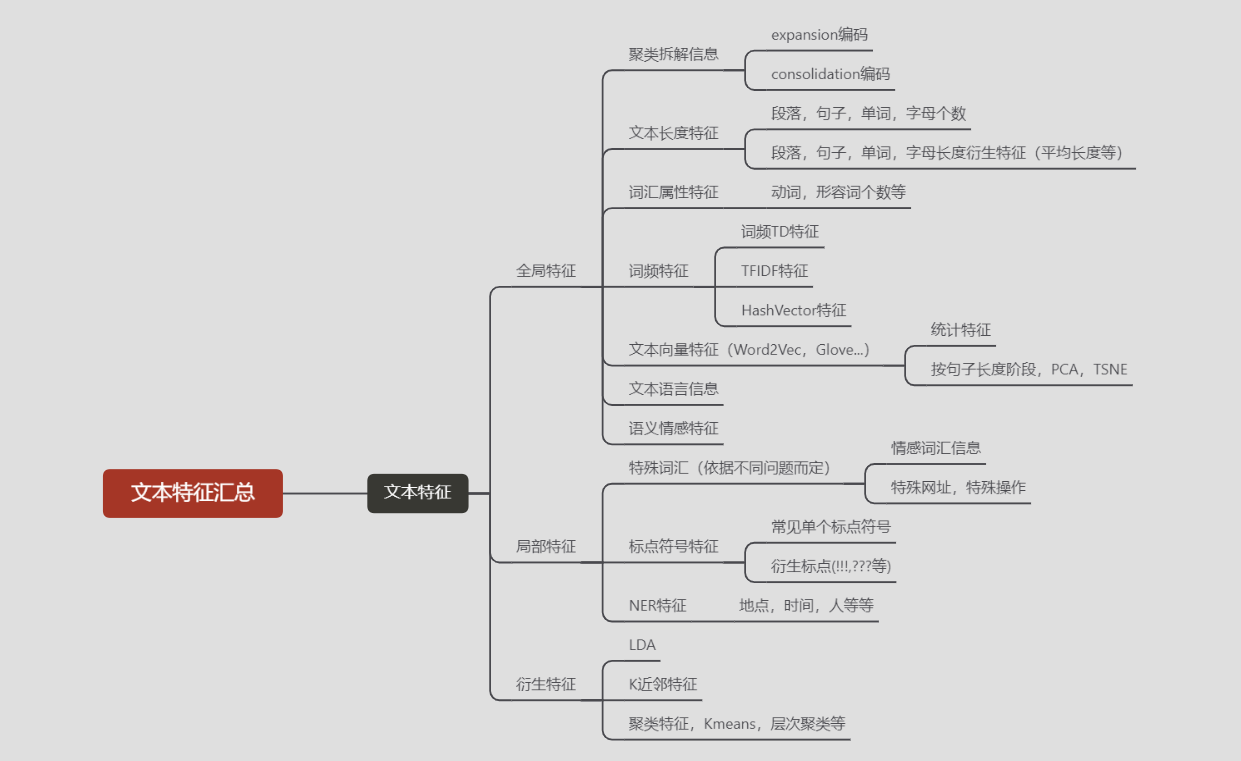

### 一些简单的文本特征可以直接当做类别特征。
- 比如：
    - 花的颜色：red,blue,yellow等
    - 名字：Mr jack,Mr smith Mrs will等
- 对这些特征可以直接进行`Label编码`然后采用类别特征的技巧对其进行特征工程

### 课题：如何防止文本内的信息丢失
- 针对梯度提升树模型对文本特征进行特征工程，我们需要充分挖掘Label编码丢失的信息。
- 比如：
    - 上面的名字特征，内部存在非常强的规律，Mr等信息，这些信息反映了性别相关的信息，如果直接进行Label编码就会丢失此类信息，所以我们可以通过文本技巧对其进行挖掘。

1. expansion编码 (expansion encoding)
    - expansion编码常常出现在一些复杂的字符串中，比如一些带有版本信息的字符串，很多版本号的信息中涵盖了`时间`以及`编号`等信息，我们需要将其拆分开，形成多个新的特征列
    - expansion编码类似于一种带有业务信息的`聚类信息`，可以加速树模型的搜索速度
                                ------
    - 1つのカテゴリカル変数を複数のラベルに分解
    - ブラウザのユーザーエージェント情報, OSのバージョン情報など、整頓されていない変数

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['feature'] = ['Apple_iPhone_6', 'Apple_iPhone_6', 'Apple_iPad_3', 'Google_Pixel_3']
df['feature_1st'] = df['feature'].apply(lambda x:x.split('_')[0])
df['feature_2nd'] = df['feature'].apply(lambda x:x.split('_')[1])
df['feature_3rd'] = df['feature'].apply(lambda x:x.split('_')[2])
df

***
2. consolidation编码(consolidation encoding)(連結変換)
    - consolidation编码常常出现在一些特殊的字符串里
    - 例如：
        - 一些带有地址的字符串，字符串会给出详细的信息，XX市XX县XX村XX号等，这时我们可以将市抽取来作为一个全新的特征
        - 很多产品，例如手机，pad等等，可以单独抽象为苹果，三星等公司等信息
    - 可以说`consolidation编码`和上面的expansion编码类似，也是一种带有业务信息的聚类信心，可以加速模型的搜索速度。
                                    ---------
    - むしろ1対1に変換せずに丸めてしまう
    - スペルミスや表記のゆらぎ, 正式名称と略称の混在するテキストデータを扱うときに有効
    - 現実のデータ, 自由記入欄は特に乱雑である

***
3. 文本长度特征
    - 文本的长度特征，可以按照文本的`段落`，`句子`，`单词`和`字母`四大粒度进行枚举式的构建，这些特征可以反应文本的段落结构，在很多问题中都是非常重要的信息。
        - 比如判断文本的类型
        - 判断文本是小说还是论文还是其他
    - 通常有以下一些方式
        1. 段落的个数：顾名思义就是文本中段落的个数
        2. 句子的个数：文本中句子的个数，可以通过计算`句号感叹号`等次数来统计。
        3. 单词的个数：文本中单词的个数，可以通过直接通过将标点符号转化为空格，然后计算空格个数的方式来计算⇒适用于**英文**
        4. 字母个数：删除所有的标点之后直接统计所有字母的个数⇒适用于**英文**
        5. 平均每个段落的句子个数：平均每个段落的句子个数 = 句子的个数/段落的个数
        6. 平均每个段落的单词个数：平均每个段落的单词个数 = 单词的个数/段落的个数
        7. 平均每个段落的字母个数：平均每个段落的字母个数 = 文本字母个数/段落的个数
        8. 平均每个句子的单词个数：平均每个句子的单词个数 = 单词的个数/句子的个数
        9. 平均每个句子的字母个数：平均每个句子的字母个数 = 文本字母个数/句子的个数
        10. 平均每个单词的长度：平均每个单词的长度 = 文本字母个数/文本单词个数

***
4. 标点符号特征
    - 标点符号也蕴藏有非常重要的信息
        - 例如在情感分类的问题中，感叹号等信息往往意味着非常强烈的情感表达，对于最终模型的预测可以带来非常大的帮助
    - 通常可以有以下一些方式：
        1. 标点符号的个数：直接计算标点符号出现的次数
        2. 特殊标点符号的个数：统计文本中一些重要的标点符号出现的次数，例如：
            - 情感分类问题中，感叹号出现的次数，问好出现的次数等
            - 在病毒预测问题中，异常符号出现的次数
        3. 其他：需要额外注意一些奇异的标点符号
            - 例如连续多个感叹号`!!!`或者连续多个问号`???`，这种符号的情感表示更为强烈，有时需要特别注意

***
5. 词汇属性特征
- 每个词都有其所属的属性（名词，动词或者形容词等等）
    - 词汇属性特征很多时候能帮助模型带来效果上的**微弱提升**
        - `prep`:介系词；前置词；preposition的缩写
        - `pron`:代名词，pronoun的缩写
        - `n`:名词，noun的缩写
        - `v`:动词，兼指及物动词和不及物动词，verb的缩写

https://www.jianshu.com/p/b6c85800c44e

***
6. 特殊词汇特征(>**标点符号**)
- 一些特殊词汇的特征更为重要
- 我们可以直接选择分类别（每一类情感表示一类）统计每个类别中词汇的出现次数

<table>
    <tr>
        <td>编号</td>
        <td>情感大类</td>
        <td>情感类</td>
        <td>例词</td>
    <tr>
    <tr>
        <td>1</td>
        <td rowspan="2">乐</td>
        <td>快乐</td>
        <td>喜悦，欢喜，笑眯眯，欢天喜地</td>
    <tr>
    <tr>
        <td>2</td>
        <td rowspan="2">乐</td>
        <td>安心</td>
        <td>踏实，宽心，定心丸，问心无愧</td>
    <tr>
    <tr>
        <td>3</td>
        <td rowspan="2">好</td>
        <td>尊敬</td>
        <td>恭敬，敬爱，毕恭毕敬，肃然起敬</td>
    <tr>
    <tr>
        <td>4</td>
        <td rowspan="2">好</td>
        <td>赞扬</td>
        <td>英俊，优秀，通情达理，实事求是</td>
    <tr>
    <tr>
        <td>...</td>
</table>

***
7. 词频特征
- 针对一些文本信息相对复杂的文本（比如句子等），需要一些常用的文本工具
    - 最为常见的就是词频统计特征：统计文本中每个词出现的出现的次数
        - 因为每个文本一般都是由单词所组成的，而每个单词出现的次数在一定程度上又可以从侧面反映该文章的内容，比如在某篇文章中，'love'这个词出现地比较多，也就是说'love'对应的词频比较大，那么我们可以猜测该文章很大可能属于情感类的文章，所以在处理文本类信息时，**词频特征**是非常重要的信息之一
    - 词频特征简单易于理解，能够从宏观的角度捕获文本的信息。
        - 相较于直接Label编码可以能提取更多有用的信息特征，从而带来效果上的提升。
        - 但是词频特征旺旺会受到**停用词**的影响，比如'the,a'出现次数往往较多，这在聚类的时候如果选用了错误的聚类距离，则往往难以获得较好的聚类效果。所有**需要细心地进行停用词的删选**
        - 词频特征也受**文本大小**的影响，如果文章较长，则词汇较多，文本较短，词汇则会较少。

In [ ]:
#导入工具包
from sklearn.feature_extraction.text import CountVectorizer

#初始化并引入停止词汇
vectorizer = CountVectorizer(stop_words=set(['the', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'four', 'not', 'own', 'through', 'yourselves']))
df = pd.DataFrame()
df['text'] =["The sky is blue.", "The sun is bright.","The sun in the sky is bright.", "We can see the shining sun, the bright sun."]

#获取词汇
vectorizer.fit_transform(df['text']).todense()

#查看文本字典：
vectorizer.vocabulary_

***
8. Tf-Idf特征
- Tf-Idf特征是词频特征的一个扩展延伸
- 词频特征可以从宏观的方面表示文本的信息，但在词频方法因为将频繁的词汇的作用放大了，比如常见的'I','the'等，或者将稀有的词汇，比如'garden'.'tiger'的作用缩减了，但是这些单词却有着极为重要的信息量，所以词频特征往往**很难捕获一些出现次数较少，但是又非常有效的信息**
- `Tf-Idf特征`可以很好地缓解此类问题
    - `Tf-Idf`从全局（所有文件）和局部（单个文件）的角度来解决上述问题，可以更好地给出**某个单词对于某个文件**的重要性。
- <u>`TfIdf`忽略了文章的内容、词汇之间的联系，虽然可以通过N-gram方式进行缓解，但其实依然没有从本质上解决该问题</u>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer()

#获取词汇
tfidf_matrix = tfidf_model.fit_transform(df['text']).todense()
tfidf_matrix

#观测文本的字典：
tfidf_model.vocabulary_,tfidf_model.idf_

***
9. LDA特征
- 基于词频的特征和基于TFIDF的特征都是向量形式的，因而我们可以采用基于向量抽取特征的方式对其抽取新特征，其中最为典型的方式就是**主题模型**
- `主题模型`的思想都是围绕以主题表示的文档语料库中提取关键主题或概念的过程为中心。
    - 每个主题都可以表示为一个包或从文档语料库收集单词/术语。
    - 这些术语共同表示特定的主题，或概念。
    - 每个主题都可以通过这些术语所表达的语义意义与其他主体进行区分。
    - 这些概念可以从简单的事实和陈述到观点和观点。
    - 主题模型在**总结大量文本特征来提取关键概念**方面非常有用。
    - 主题模型还可以从捕获数据中**潜在模式**的文本数据中提取特征。
- 一般我们会在TD-IDF或者词频等距阵上使用LDA，最终我们的得到的结果也可以拆解为下面两个核心部分：
    - `document-topic矩阵`：这将是我们需要的特征矩阵
    - `一个topic-term矩阵`：它帮助我们查看语料库中的潜在主题。

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components = 2,max_iter = 10000,
                                random_state = 0)
dt_matrix =LDA.fit_transform(tfidf_matrix)
features = pd.DataFrame(dt_matrix,columns=['T1','T2'])
features

In [ ]:
#查看主题以及对应的每个词的共现
tt_matrix = LDA.components_
vocab = tfidf_model.get_feature_names()
for topic_weights in tt_matrix:
    topic = [(token,weight) for token,weight in zip(vocab,topic_weights)]
    topic = sorted(topic,key=lambda x:-x[1])
    topic = [item for item in topic if item[1]>0.2]
    print(topic)

***
10. 文本向量特征
- TFIDF特征可以缓解词频特征的高频词汇特征带来的问题，同时通过N-gram的策略还可以简洁捕捉文本中的词的关系，但这些信息的捕捉还是较差的，而且N-gram的策略还会使得字典过大，带来存储的问题。但是**词向量特征却可以很好地缓解这两个问题**

- `词嵌入模型(word embedding)`通过建立所选词与相邻前后词之间的概率分布，将词映射到某个维度的向量。
    - 这样我们就仅仅需要记录每个词对应的向量，而且在实践中我们发现基于词向量的特征往往能取得更好的效果，这也从侧面说明词向量的形式可以更好地捕捉**词与词之间的关系**
    - 目前可以通过`Gensim`来抽取词向量。
        - 因为我们抽取的是基于词的向量，而不同文本的词的个数是不一样的，所以最后还需要通过某种转化将我们的文本特征<u>**转化为相同维度的特征**</u>。
        - 最常见的就是下面两种策略：
            1. 计算统计特征，例如均值，中位数，方差等等
            2. 先将文本长度进行截断，缺失的补0，然后进行PCA，TSNE等进行转化
        - 目前可以产出词向量的策略非常多，比如`word2vec,Glove`等等，还有许多最新预训练好的包都可以直接拿过来使用

In [ ]:
import gensim.downloader as gensim_api
glove_model = gensim_api.load('glove-wiki-gigaword-300')
word = 'love'
glove_model[word]

***
11. HashVector
- 不管是CounterVector,TfidfVectorizer还是WordVector等词向量的方式抽取的特征我们都需要存储一个映射表，这会带来非常大的**内存压力**，但我们仍需要将文档编码为向量，这时候我们需要用到`HashVector`
- `HashingVectorizer`不存储结果词汇表，该方法使用**单向哈希方法**将单词转化成整数，因此我们<u>**不需要词汇表**，**可以选择任意长的固定长度向量**</u>,这对于大型数据集非常有效。
    - 单向哈希方法缺点是：<u>哈希量化是单向的，因此无法将编码转换回单词</u>，在很多有监督学习中是不影响的。


- 因为我们使用的是HashVector就自然会存在**[散列冲突](https://zhuanlan.zhihu.com/p/29520044)**的问题（如果矩阵大小太小，则必然会发生这种情况）
- 在计算资源达到最大值的情况下，**HashVector**是非常好的特征

                                     ========
- **Note:`Hash算法`**
    - 其他参考文献[hash算法原理详解](https://blog.csdn.net/tanggao1314/article/details/51457585)
1. 简介
     - 哈希（hash）也翻译做散列。
     - hash算法，是将一个不定长的输入，通过散列函数变换成一个定长的输出，即`散列值`
     - 这种散列变换是一种单向运算，具有**不可逆性**，即不能根据散列值还原出输入信息，因此严格来说**Hash算法是一种消息摘要算法**，不是一种加密算法。
     - 常见的Hash算法有`SM3`，`MD5`,`SHA-1`等
2. 应用
     - Hash主要应用在数据结构以及密码学领域
     - 在不同应用场景下，hash函数的选择也会有所侧重。
         - 在管理数据结构时，主要要考虑运算的**快速性**，并且要保证hash的**均匀分布**
         - 在密码学中就要有限考虑**抗碰撞性**，避免出现两段不同明文的hash值相同的情况发生
             - 2.1 在密码学领域的应用：在密码学中，Hash算法的作用主要是用于消息摘要和签名，换句话说，它主要用于对整个消息的完整性进行校验。
                 - 比如一些登录网站并不会直接明文存储用户密码，存储的是经过hash处理的密码的摘要（hash值），当用户登录时，只需要对比输入明文的摘要与数据库存储的摘要是否相同；即使黑客入侵或者维护人员访问数据库也无法获取用户的密码明文，大大提高了安全性。
             - 2.2 在数据结构中的应用：使用Hash算法的数据结构叫做哈希表，也叫散列表，主要是为了**提高查询的效率**。
                 - 它通过把关键码值映射到表中一个位置来访问记录，以**加快查找的速**度。
                 - 这个映射函数就是`hash函数`，存放记录的数组叫做`哈希表`。
                 - 在数据结构中应用时，有时需要**较高的运算速度**而弱化考虑抗碰撞性，可以使用自己构建的哈希函数。
3. Hash算法的python实现
    - 3.1 自定义哈希函数
    - 3.2 hash()函数
        - 在python中有内置的哈希函数`hash()`，返回一个对象（**数字，字符串**，但是不能直接用于list,set,字典）的哈希值
        - 相同字符串在同一次运行时的哈希值是相同的，但是不同次运行的哈希值不同。
            - 这是因为Python的字符串hash算法有一个启动时随时生成secret prefix/suffix的机制，存在随机化现象：对同一个字符串输入，不同解释器进程得到的hash结果可能不同。
        - 因此当需要做可重现可跨进程保持一致性的hash，需要用到`hashlib`模块
    - 3.3 hashlib()模块
        - hashlib提供了常见的摘要算法，如`MD5`,`SHA1`等等
         

In [ ]:
#3.1自定义哈希函数
def my_hash(x):
    return (x % 7)^2

my_hash(1),my_hash(2),my_hash(3)

In [ ]:
#3.2 hash()函数
#hash()

print(hash(1),hash(1.0)) # 相同的数值，不同类型，哈希值是一样的
print(hash('abc')) 

In [ ]:
import hashlib
 
md5 = hashlib.md5()     # 应用MD5算法
data = 'hello world'
md5.update(data.encode('utf-8'))
print(md5.hexdigest())

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
text = ["The quick brown fox jumped over the lazy dog."]
vectorizer = HashingVectorizer(n_features = 20)
vector = vectorizer.transform(text)
print(vector.shape)
print(vector.toarray())

***
12. 文本语言信息

- 在很多问题中，并不是所有的文本都是同一种语言，这个时候我们需要对不同的文本进行分类，判断其是哪一种类型的语言
|text|lang|
|-|-|
|I love it.|sl|
|我喜欢你。|zh-cn|
|I think you are great!|en|
|会いたい|ja|

In [ ]:
# !pip install langdetect

In [ ]:
import pandas as pd
import langdetect

df = pd.DataFrame()
df['text'] = ['I love it.', '我喜欢你。', 'I think you are great!', '会いたい']
df['lang'] = df['text'].apply(lambda x:langdetect.detect(x) if x.strip() != '' else '')
df

***
13. 语意特征
- 情感分析是通过数字或类来表达文本数据的主观情感，在非常多的问题中都至关重要。
- 目前情感分析是自然语言处理中最困难的任务之一，需要处理自然语言的歧义等问题。但是如果我们能很好地挖掘出文本的情感，那么对于我们模型的帮助是非常巨大的。

- 但是一个好的语言模型的训练是非常耗费时间的，如果没有足够的时间或数据时，我们可以使用预先训练好的模型，比如**`Textblob`和`Vader`**。
    - `Textblob`建立在NLTK上，是最流行的语言之一，他可以给单词**分配极性**，并将整个文本的情感作为一个平均值进行估计。
    - `Vader`是一个基于规则的模型，目前再社交媒体的数据上使用较多。
        - 参考：[Pythonによる自然言語処理　5-2. 感情強度分析ツール VADER](https://qiita.com/y_itoh/items/fb24de866ae132d0ec3b)

In [ ]:
import pandas as pd
from textblob import TextBlob
'''
从下面的结果来看，情感的特征还是相对靠谱的
'''
df = pd.DataFrame()
df['text'] = ['I love it.', 'I hate you.', 'I think you are great!', 'She is beautiful.', 'Good!', 'No problem.']
df["sentiment"] = df['text'].apply(lambda x:  TextBlob(x).sentiment.polarity)
df.head()

***
14. NER特征
- 命名实体识别(Named entity recongnition, NER)是用预定义的类别(如人名，地点，组织等)标记非结构化文本中提到的命名实体的过程。
- 这些重要的命名实体在非常多的问题中都很有用。
    - 例如：判断某用户点击某广告的概率等，可以通过NER识别出广告中的代言人，一句代言人与用户的喜好来判定用户点击某条广告的概率
- 目前使用较多的NER工具包是`SpaCy`
    - https://github.com/explosion/spacy-models/releases
    - 关于NER目前能处理多少不同的命名实体，可以参考Spacy工具包
    - 除了可与直接抽取我们想要的NER特征，SpaCy还可以对其进行标亮。
      

In [ ]:
import spacy
import pandas as pd
import zh_core_web_sm
# !python -m spacy download zh_core_web_sm
# ner = spacy.load("zh_core_web_sm")
#error対応：https://github.com/explosion/spaCy/issues/4577

ner = zh_core_web_sm.load()
df = pd.DataFrame()
df['txt'] = ['在无锡车站，我遇见了来自南京的你。','我喜欢四川。','成都的女孩喜欢吃辣。']
df["tags"] = df["txt"].apply(lambda x: [(tag.text, tag.label_)   for tag in ner(x).ents] )
df 

In [ ]:
txt = '在无锡车站，我遇见了来自南京的你。但没想到你那么喜欢吃四川的火锅。'
doc = ner(txt)
## display result
spacy.displacy.render(doc, style="ent")

***
15. K近邻特征
- 除了LDA主题模型，我们基于向量做得最多的衍生特征就是**相似度特征**。
    - 我们找到距离每个文本最近的N个文本，
    - 并将最近的N个文本对应的ID以及其与当前文本的距离作为我们新的特征。
    - 距离的计算方式可以是欧几里得，cosine等等，依据距离的不同，文本相似度特征可以有非常多
    - 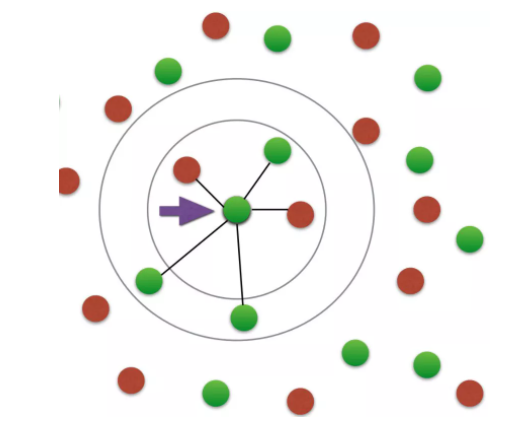

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_matrix

***
16. 聚类特征
- 和K近邻特征经常一起使用的就是**聚类特征**
- 同样的，因为聚类特征的方式是非常多的，最常见的就是**Kmeans**等等，此处列举常见的两种聚类特征。

In [ ]:
#Kmeans聚类
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit_predict(tfidf_matrix)

In [ ]:
#hierarchy聚类
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(tfidf_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
cluster_labels

***
- 总结
    - 上述特征可以作为神经网络的Dense侧特征加入模型训练或者直接抽取放入梯度提升树模型进行训练，往往可以带来不错的提升。
- 参考文献：
1. https://blog.socratesk.com/blog/2018/06/17/featuren-engineering-and-extraction
2. https://datascience.stackexchange.com/questions/10509/how-to-deal-with-categorical-feature-of-very-high-cardinality
3. KaggleDays SF: 2. Amazon - Unsupervised encoding
4. Mean (likelihood) encodings: a comprehensive study
5. http://blog.kaggle.com/2015/06/22/profiling-top-kagglers-owen-zhang-currently-1-in-the-world/
6. Feature Engineering Techniques
7. How the Magic Works
8. Why One-Hot Encode Data in Machine Learning?
9. Label Encoding in Python Explained
10. Why does frequency encoding work?
11. Encoding categorical variables using likelihood estimation
12. Mean (likelihood) encoding for categorical variables with high cardinality and feature interactions: a comprehensive study with Python
13. Category Encoders
14. Leave One Out Encoding for Categorical Feature Variables on Spark
15. https://github.com/pourya-ir/Medium/tree/master/K-fold-target-enc
16. How to deal with Features having high cardinality
17. https://github.com/scikit-learn-contrib/category_encoders
18. Handling Categorical Data in Python
19. Here’s All you Need to Know About Encoding Categorical Data (with Python code)
20. Encodings for Ordered Data
21. Feature Engineering, Feature Extraction, and Feature Selection
22. Detailed Text Based Feature Engineering
23. Extensive Text Data Feature Engineering
24. 了解一下Sklearn中的文本特征提取
25. Traditional Methods for Text Data
26. Feature Extraction from Text (USING PYTHON)
27. https://spacy.io/usage/linguistic-features
28. https://github.com/RaRe-Technologies/gensim-data
29. Text Analysis & Feature Engineering with NLP
30. Foundations of AI & ML
31. Feature Engineering Methods for Text Data
32. HashingVectorizer vs. CountVectorizer
33. 使用Scikit-Learn提取文本特征